<a href="https://colab.research.google.com/github/vikramnarasimha/deeplearning-notebooks/blob/main/MNIST_Threes_And_Sevens_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -Uqq fastbook
from fastbook import *


     |████████████████████████████████| 727kB 15.2MB/s 
     |████████████████████████████████| 194kB 46.3MB/s 
     |████████████████████████████████| 1.2MB 48.6MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 12.8MB 284kB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 776.8MB 20kB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.


In [4]:
path = untar_data(URLs.MNIST_SAMPLE)

In [5]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid')]

In [6]:
threes=(path/'train/3').ls()

In [7]:
sevens=(path/'train/7').ls()

In [8]:
im3 = Image.open(threes[1])
im3

In [9]:
array(im3)[4:10,4:10]

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 13]], dtype=uint8)

In [10]:
tensor(im3)[4:10,4:10]

tensor([[ 0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0, 13]], dtype=torch.uint8)

In [11]:
three_tensors = [tensor(Image.open(o)) for o in threes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape
stacked_sevens.shape

torch.Size([6265, 28, 28])

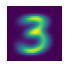

In [12]:
mean_3 = stacked_threes.mean(0)
show_image(mean_3)

In [13]:
mean_3

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.2918e-05, 1.9637e-04, 2.3410e-04, 1.9253e-04, 2.7568e-04, 2.6161e-04,
         2.9423e-04, 2.8400e-04, 1.5671e-04, 4.8612e-05, 5.7567e-06, 0.0000e+00, 0.0000e+

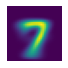

In [14]:
mean_7 = stacked_sevens.mean(0)
show_image(mean_7)

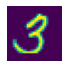

In [36]:
a_3 = stacked_threes[1]
show_image(a_3)


In [38]:

dist_3_abs = (a_3 - mean_3).abs().mean()
dist_3_sqr = ((a_3 - mean_3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1305), tensor(0.2345))

In [39]:

dist_7_abs = (a_3 - mean_7).abs().mean()
dist_7_sqr = ((a_3 - mean_7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1427), tensor(0.2736))

In [40]:
def is_three(some_digit):
  dist_3_sqr = (some_digit - mean_3).abs().mean((-1,-2))
  dist_7_sqr = (some_digit - mean_7).abs().mean((-1,-2))
  return (dist_3_sqr < dist_7_sqr)


In [41]:

valid_3_paths = (path/'valid/3').ls()
Image.open(valid_3_paths[1])


In [23]:
valid_threes = torch.stack([tensor(Image.open(o)) for o in (path/'valid/3').ls()]).float()/255
valid_threes.shape

torch.Size([1010, 28, 28])

In [42]:
valid_threes_predictions = is_three(valid_threes)
valid_threes_predictions


tensor([True, True, True,  ..., True, True, True])

In [43]:
valid_threes_predictions.float().mean()

tensor(0.9168)

In [49]:
valid_sevens = torch.stack([tensor(Image.open(o)) for o in (path/'valid/7').ls()]).float()/255
valid_sevens_predictions = is_three(valid_sevens)
1- valid_sevens_predictions.float().mean()

tensor(0.9854)